In [3]:
#read data from the file and handle null values

import pandas as pd
df = pd.read_csv('orders.csv',na_values=['Not Available','unknown'])
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

In [4]:
#rename columns names ..make them lower case and replace space with underscore

df.rename(columns={'Order Id':'order_id', 'City':'city'})
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')
df.head(5)


,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,10-01-2023,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,13-07-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [34]:
df['segment'].value_counts()

segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

   order_id order_date       ship_mode    segment        country  \
0         1 2023-03-01    Second Class   Consumer  United States   
1         2 2023-08-15    Second Class   Consumer  United States   
2         3 2023-01-10    Second Class  Corporate  United States   
3         4 2022-06-18  Standard Class   Consumer  United States   
4         5 2022-07-13  Standard Class   Consumer  United States   

              city       state  postal_code region         category  \
0        Henderson    Kentucky        42420  South        Furniture   
1        Henderson    Kentucky        42420  South        Furniture   
2      Los Angeles  California        90036   West  Office Supplies   
3  Fort Lauderdale     Florida        33311  South        Furniture   
4  Fort Lauderdale     Florida        33311  South  Office Supplies   

  sub_category       product_id  quantity  discount  sale_price  profit  
0    Bookcases  FUR-BO-10001798         2       5.2       254.8    14.8  
1       Chairs  

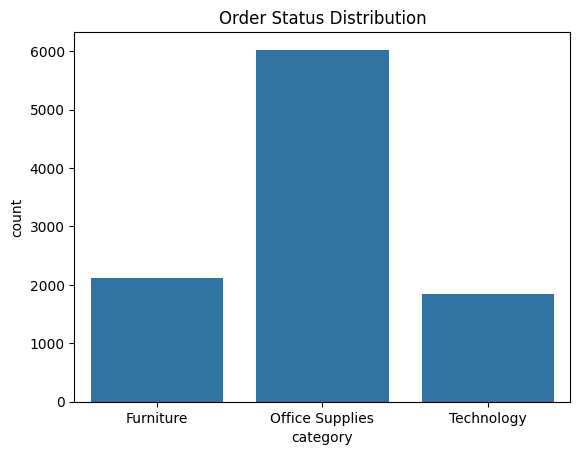

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying the first few rows
print(df.head())

# Visualizing order status distribution
sns.countplot(data=df, x='category')
plt.title('Order Category Distribution')
plt.show()

In [5]:
#derive new columns discount , sale price and profit

df['discount']=df['list_price']*df['discount_percent']*.01
df['sale_price']= df['list_price']-df['discount']
df['profit']=df['sale_price']-df['cost_price']
df


,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,10-01-2023,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,13-07-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,18-02-2023,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4,1.2,28.8,-1.2
9990,9991,17-03-2023,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4,3.6,86.4,16.4
9991,9992,07-08-2022,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2,5.2,254.8,34.8
9992,9993,19-11-2022,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3,0.9,29.1,-0.9


In [11]:
#convert order date from object data type to datetime

df['order_date'] = pd.to_datetime(df['order_date'], format="%d-%m-%Y")

In [12]:
#drop cost price list price and discount percent columns

df.drop(columns=['list_price','cost_price','discount_percent'],inplace=True)

In [1]:
#load the data into sql server using replace option

import sqlalchemy as sal
from sqlalchemy.engine import URL

connection_url = URL.create(
    "mssql+pyodbc",
    username=None,  # Use None for Windows Authentication
    password=None,  # Use None for Windows Authentication
    host="VENKY\\SQLEXPRESS",
    port=1433,  # Default SQL Server port
    database="master",  # Replace with your target database
    query={"driver": "ODBC Driver 18 for SQL Server"}
)

# Create the SQLAlchemy engine
engine = sal.create_engine(connection_url)
conn = engine.connect()

OperationalError: (pyodbc.OperationalError) ('08001', '[08001] [Microsoft][ODBC Driver 18 for SQL Server]TCP Provider: No such host is known.\r\n (11001) (SQLDriverConnect); [08001] [Microsoft][ODBC Driver 18 for SQL Server]Login timeout expired (0); [08001] [Microsoft][ODBC Driver 18 for SQL Server]A network-related or instance-specific error has occurred while establishing a connection to VENKY\\SQLEXPRESS,1433. Server is not found or not accessible. Check if instance name is correct and if SQL Server is configured to allow remote connections. For more information see SQL Server Books Online. (11001)')
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
# In[172]:

#load the data into sql server using append option
df.to_sql('df_orders', con=conn , index=False, if_exists = 'append')
